In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re

In [22]:
# Load dataset
train_data = pd.read_csv(r"C:\Users\hp\Downloads\train_product_data.csv")
test_data = pd.read_excel(r"C:\Users\hp\Downloads\test_data.xlsx")

In [24]:
# Inspect the data
print(train_data.head())
print(train_data.info())


                            uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
2  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
3  ce5a6818f7707e2cb61fdcdbba61f5ad  2016-03-25 22:59:23 +0000   
4  29c8d290caa451f97b1c32df64477a2c  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
2  http://www.flipkart.com/alisha-solid-women-s-c...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/dilli-bazaaar-bellies-...   

                                        product_name product_category_tree  \
0                Alisha Solid Women's Cycling Shorts             Clothing    
1                                         AW Bellies             Footwear    
2                Alisha Solid Wo

In [25]:
# Handle missing values
train_data.fillna({'description': 'No description', 'product_name': 'Unknown'}, inplace=True)

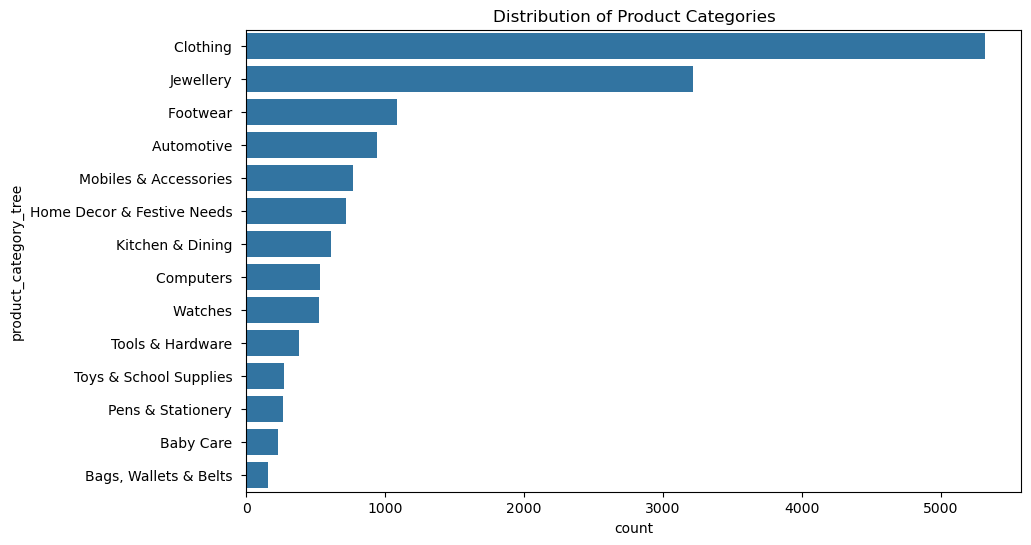

In [26]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(y='product_category_tree', data=train_data, order=train_data['product_category_tree'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.show()

In [31]:
# Outlier detection using Z-score
def detect_outliers(df, threshold=3):
    mean = np.mean(df)
    std_dev = np.std(df)
    return np.where(np.abs((df - mean) / std_dev) > threshold)

In [33]:
# Preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

In [35]:
# Apply preprocessing
train_data['cleaned_description'] = train_data['description'].apply(preprocess_text)
train_data['cleaned_name'] = train_data['product_name'].apply(preprocess_text)

In [36]:
# Vectorization using TF-IDF
vectorizer_description = TfidfVectorizer(stop_words='english', max_features=5000)
vectorizer_name = TfidfVectorizer(stop_words='english', max_features=5000)

X_description = vectorizer_description.fit_transform(train_data['cleaned_description'])
X_name = vectorizer_name.fit_transform(train_data['cleaned_name'])

In [38]:
# Combine features
X = np.hstack((X_description.toarray(), X_name.toarray()))
y = train_data['product_category_tree']

In [39]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# Build the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Validate the model
y_pred = model.predict(X_val)

In [ ]:
# Evaluate the model
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

In [ ]:
# Preprocess and predict on the test dataset
test_data.fillna({'description': 'No description', 'product_name': 'Unknown'}, inplace=True)
test_data['cleaned_description'] = test_data['description'].apply(preprocess_text)
test_data['cleaned_name'] = test_data['product_name'].apply(preprocess_text)

X_test_description = vectorizer_description.transform(test_data['cleaned_description'])
X_test_name = vectorizer_name.transform(test_data['cleaned_name'])
X_test = np.hstack((X_test_description.toarray(), X_test_name.toarray()))

In [ ]:
# Make predictions on the test data
test_predictions = model.predict(X_test)


In [ ]:
# Save the results
results = pd.DataFrame({'uniq_id': test_data['uniq_id'], 'predicted_category': test_predictions})
results.to_csv(r"C:\Users\hp\Downloads\test_results.csv", index=False)

print("Predictions saved to test_results.csv")